# Purpose:

The purpose of this notebook is to show a simple way of computing the gradients of a function  with PyTorch and then plotting them with the function.  Also, it will illustrate local minimas empirically. 

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# x inputs

x = torch.linspace(-2,2,50_000,requires_grad=True) # the number of spaces will come in handy later

In [3]:
# the function

def f(x):
    return torch.cos(2*torch.pi*x)+x**2

In [4]:
# outputs

y = f(x)

In [5]:
# computing the gradients for each x input

y.backward(torch.ones_like(x))

In [6]:
# saving the gradients as an object

grads = x.grad

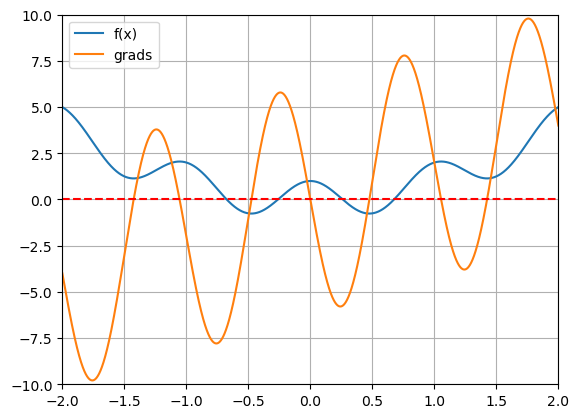

In [7]:
# plotting the function and the gradients

plt.plot(x.detach().numpy(),y.detach().numpy(), label='f(x)')
plt.plot(x.detach().numpy(),grads, label='grads')
plt.xlim(x.detach().numpy()[[0,-1]])
plt.ylim([-10,10])
plt.grid()
plt.axhline(0, c='r', ls='--')
plt.legend()

-

In [8]:
# finding the global minima empirically

# creating a matrix of x,y,grads
y_and_grads = np.column_stack((x.detach().numpy(),y.detach().numpy(),grads.detach().numpy()))

# need to make the values positive for finding the grad closest to 0
y_and_grads1 = np.sqrt(y_and_grads**2) 

# finding the inx position of the smalles grad
loc_min = y_and_grads[y_and_grads1[:,2].argmin()] 
loc_min

array([ 4.7580948e-01, -7.6207656e-01,  2.8890371e-04], dtype=float32)

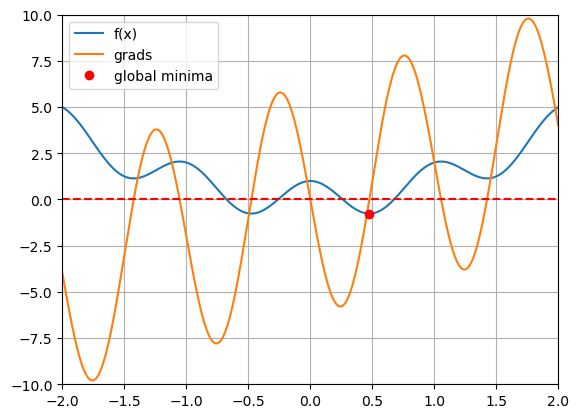

In [9]:
# plotitng the global minima

plt.plot(x.detach().numpy(),y.detach().numpy(), label='f(x)')
plt.plot(x.detach().numpy(),grads, label='grads')
plt.plot(loc_min[0], loc_min[1], 'ro', label='global minima')
plt.xlim(x.detach().numpy()[[0,-1]])
plt.ylim([-10,10])
plt.grid()
plt.axhline(0, c='r', ls='--')
plt.legend()